# Decision Tree in Python

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [98]:
# data
Age = [36, 42, 23, 52, 43, 44, 66, 35, 52, 35, 24, 18, 45]
Expr = [10, 12, 4, 4, 21, 14, 3, 14, 13, 5, 3, 3, 9]
Rank = [9, 4, 6, 4, 8, 5, 7, 9, 7, 9, 5, 7, 9]
Nationality = ['UK', 'USA', 'N', 'USA', 'USA', 'UK', 'N', 'UK', 'N', 'N', 'USA', 'UK', 'UK']
Go = ['NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES']

In [99]:
df = pd.DataFrame({'Age':Age, 'Expr':Expr, 'Rank':Rank, 'Nationality':Nationality, 'Go':Go})
df

,Age,Expr,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [100]:
#mapt strings to numeric values  Nationality, Go
d1 = {'UK':0, 'USA':1, 'N':2}
df['Nationality'] = df['Nationality'].map(d1)
d2 = {'NO':0, 'YES':1}
df['Go'] = df['Go'].map(d2)
df

,Age,Expr,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


In [101]:
features =['Age','Expr','Rank','Nationality']
X = df[features]
y = df['Go']
X, y

(    Age  Expr  Rank  Nationality
 0    36    10     9            0
 1    42    12     4            1
 2    23     4     6            2
 3    52     4     4            1
 4    43    21     8            1
 5    44    14     5            0
 6    66     3     7            2
 7    35    14     9            0
 8    52    13     7            2
 9    35     5     9            2
 10   24     3     5            1
 11   18     3     7            0
 12   45     9     9            0,
 0     0
 1     0
 2     0
 3     0
 4     1
 5     0
 6     1
 7     1
 8     1
 9     1
 10    0
 11    1
 12    1
 Name: Go, dtype: int64)

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [103]:
dtree = DecisionTreeClassifier().fit(X,y)
dtree

DecisionTreeClassifier()

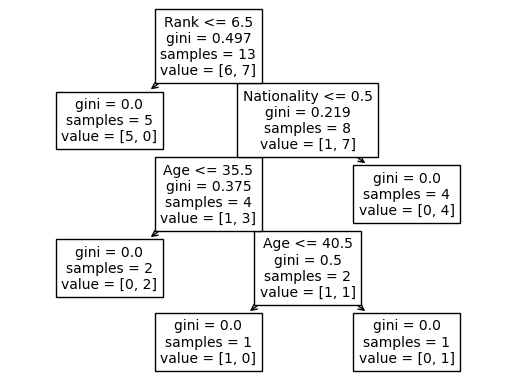

In [104]:
tree.plot_tree(dtree, feature_names = features)
plt.show()

-  Rank <= 6.5 means that every persion with a rank of 6.5 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).
- gini = 0.497 refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle.
- samples = 13 means that there are 13 comedians left at this point in the decision, which is all of them since this is the first step.
- value = [6, 7] means that of these 13 persons, 6 will get a "NO", and 7 will get a "GO".

## Gini Index
-  There are many ways to split the samples, we use the GINI method in this tutorial.
-  The Gini method uses this formula:
    -  Gini = 1 - (x/n)2 - (y/n)2
    -  Where x is the number of positive answers("GO"), n is the number of samples, and y is the number of negative answers ("NO"), which gives us this calculation:
    -  1 - (7 / 13)2 - (6 / 13)2 = 0.497

# Links
-  https://www.w3schools.com/python/python_ml_decision_tree.asp

In [107]:
dtree.predict([[40, 10, 7,1]])

/Users/du/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [108]:
dtree.predict([[40, 10, 6,1]])

/Users/du/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

-  You will see that the Decision Tree gives you different results if you run it enough times, even if you feed it with the same data.
-  That is because the Decision Tree does not give us a 100% certain answer. It is based on the probability of an outcome, and the answer will vary.

In [109]:
# diabetes Data
urlDB = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'

In [110]:
# diabetes data
df = pd.read_csv(urlDB)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [111]:
X = df.drop(columns='Outcome')
y = df.Outcome
X.shape, y.shape

((768, 8), (768,))

In [112]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [114]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=3)

In [115]:
y_pred_train = clf.predict(X_train)
y_pred_train

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [116]:
# Accuracy of train data
metrics.accuracy_score(y_train, y_pred_train)

0.7635009310986964

In [117]:
pd.concat([pd.Series(y_train).reset_index(drop=True), pd.Series(y_pred_train).reset_index(drop=True)], axis=1, keys=['Actual','Predicted']).reset_index()
#actual & predicted for training data

,index,Actual,Predicted
0,0,1,1
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
532,532,0,1
533,533,1,1
534,534,1,0
535,535,1,1


In [118]:
# Accuracy of test data
y_pred_test = clf.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [119]:
# Accuracy of train data
metrics.accuracy_score(y_test, y_pred_test)

0.7575757575757576

In [120]:
pd.concat([pd.Series(y_test).reset_index(drop=True), pd.Series(y_pred_test).reset_index(drop=True)], axis=1, keys=['Actual','Predicted']).reset_index()
#actual & predicted for test data

,index,Actual,Predicted
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
226,226,0,0
227,227,0,0
228,228,0,0
229,229,1,1


In [121]:
print(tree.export_text(clf))


|--- feature_1 <= 129.50
|   |--- feature_5 <= 26.30
|   |   |--- feature_5 <= 9.10
|   |   |   |--- class: 0
|   |   |--- feature_5 >  9.10
|   |   |   |--- class: 0
|   |--- feature_5 >  26.30
|   |   |--- feature_7 <= 27.50
|   |   |   |--- class: 0
|   |   |--- feature_7 >  27.50
|   |   |   |--- class: 0
|--- feature_1 >  129.50
|   |--- feature_5 <= 27.85
|   |   |--- feature_1 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  145.50
|   |   |   |--- class: 0
|   |--- feature_5 >  27.85
|   |   |--- feature_1 <= 158.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  158.50
|   |   |   |--- class: 1



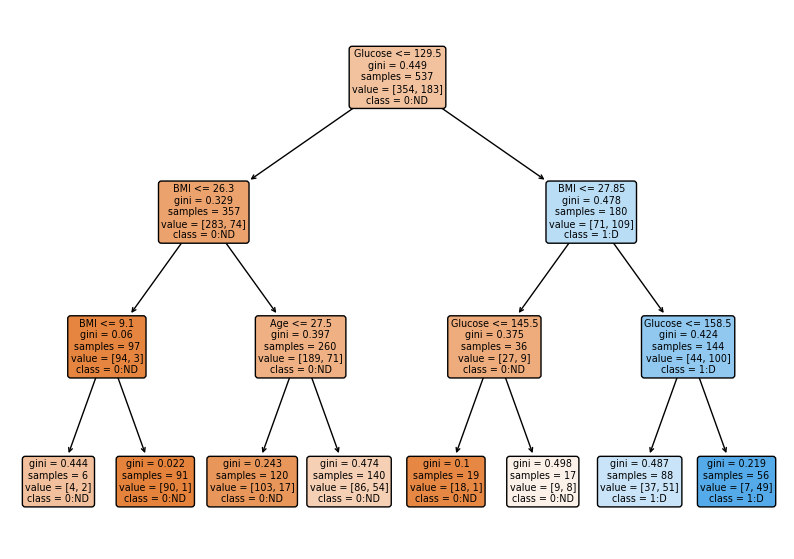

In [122]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, feature_names = X.columns, class_names=['0:ND','1:D'], filled=True, rounded=True)

# Decision Tree Pros
-  Decision trees are easy to interpret and visualize.
-  It can easily capture Non-linear patterns.
-  It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
-  It can be used for feature engineering such as predicting missing values, suitable for variable selection.
-  The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)
# Decision Tree Cons
-  Sensitive to noisy data. It can overfit noisy data.
-  The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
-  Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

!pip install graphviz
!pip install pydotplus

In [123]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
#Image(graph.create_png())